In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt 

In [2]:
genes = ['gene' + str(i) for i in range(1,101)]
 


In [3]:
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]
 
data = pd.DataFrame(columns=[*wt, *ko], index=genes)
 


In [5]:
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    
    
print(data)
print(data.shape)

         wt1  wt2  wt3  wt4  wt5   ko1  ko2  ko3  ko4  ko5
gene1    660  626  658  625  616   762  704  684  706  756
gene2    880  927  898  843  908   888  878  901  894  994
gene3    889  875  890  892  868   181  186  167  176  172
gene4    872  812  843  777  815   325  304  304  326  308
gene5    209  179  225  219  196   163  198  193  202  190
...      ...  ...  ...  ...  ...   ...  ...  ...  ...  ...
gene96   898  862  876  820  820  1009  930  971  951  965
gene97    61   46   79   60   73   918  938  887  934  877
gene98   902  911  881  901  848   767  750  777  783  781
gene99   881  815  792  817  827   468  507  503  518  539
gene100  899  861  884  828  911   816  829  796  809  827

[100 rows x 10 columns]
(100, 10)


In [6]:
# First center and scale the data
scaled_data = preprocessing.scale(data.T)
 
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data
 

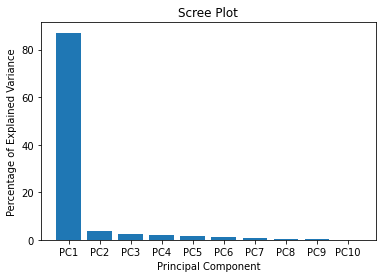

In [7]:
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

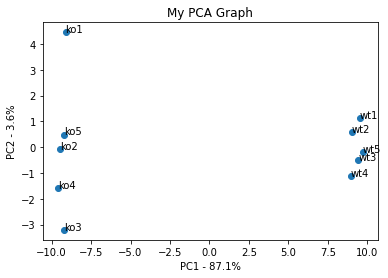

In [9]:
#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 

plt.show()